In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
expression_minmax_df = pd.read_csv('../data/processed/expression_tpm_minmax.tsv', sep='\t', index_col=0)

In [3]:
expression_minmax_df = expression_minmax_df.set_index('pog_id')

In [4]:
drugs_df = pd.read_csv('../data/processed/drugs_filtered.tsv', sep='\t', index_col=0)

In [5]:
drugs_selected_df = drugs_df[['pog_id', 'drug_name', 'days_on_tx_since_biopsy', 'cancer_cohort']]

## Join drugs and expression tables

In [6]:
drugs_expression_df = drugs_selected_df.join(expression_minmax_df, on='pog_id', how='inner')

In [7]:
drugs_expression_df = drugs_expression_df.drop_duplicates()

Number of drug types and their names

## Cancer type counts

In [13]:
cohorts, counts = np.unique(drugs_expression_df['cancer_cohort'], return_counts=True)

In [14]:
sorted_index = np.argsort(counts)

In [15]:
cohorts = cohorts[sorted_index]
counts = counts[sorted_index]

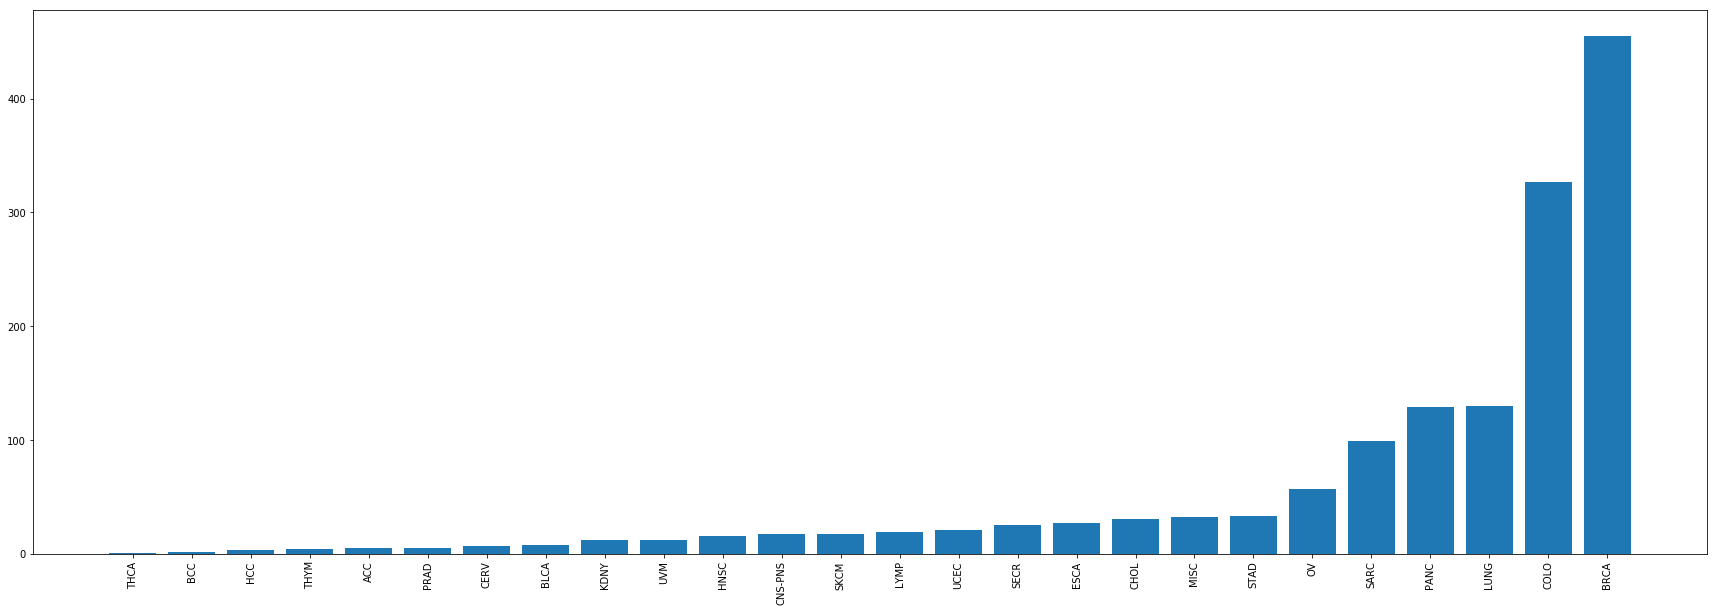

In [16]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(cohorts, counts)
plt.show()

In [18]:
drugs, counts = np.unique(drugs_expression_df['drug_name'], return_counts=True)

In [19]:
sorted_index = np.argsort(counts)

In [20]:
drugs = drugs[sorted_index]
counts = counts[sorted_index]

In [21]:
drugs

array(['MOXR0916', 'AGS67E', 'VEMURAFENIB', 'TEMSIROLIMUS', 'DACARBAZINE',
       'BICALUTAMIDE', 'RIBOCICLIB', 'RALTITREXED', 'PEGFILGRASTIM',
       'FLUDROCORTISONE', 'MEGESTROL', 'LOMUSTINE', 'LANREOTIDE',
       'IMATINIB', 'IRBESARTAN', 'LAPATINIB', 'MONALIZUMAB',
       'TASELISIB/PLACEBO', 'MGCD265', 'ENZALUTAMIDE', 'VORINOSTAT',
       'ANASTROZOLE', 'BMS-986115', 'CX-5461', 'CERITINIB', 'VISMODEGIB',
       'EPIRUBICIN', 'VINCRISTINE', 'ERLOTINIB', 'PAZOPANIB', 'TOPOTECAN',
       'IPILIMUMAB', 'CLODRONATE', 'TAMOXIFEN', 'GEFITINIB',
       'RAMUCIRUMAB', 'OSIMERTINIB', 'DEXAMETHASONE', 'TRAMETINIB',
       'METHOTREXATE', 'PERTUZUMAB', 'REGORAFENIB', 'SORAFENIB',
       'BMS-986205', 'AFATINIB', 'CETUXIMAB', 'ATEZOLIZUMAB', 'OLAPARIB',
       'CRIZOTINIB', 'TEMOZOLOMIDE', 'GOSERELIN', 'OCTREOTIDE',
       'FULVESTRANT', 'SUNITINIB', 'IFOSFAMIDE', 'VINORELBINE',
       'PANITUMUMAB', 'MESNA', 'TREMELIMUMAB', 'DURVALUMAB',
       'PEMBROLIZUMAB', 'ETOPOSIDE', 'CYCLOPHOSPHAMIDE

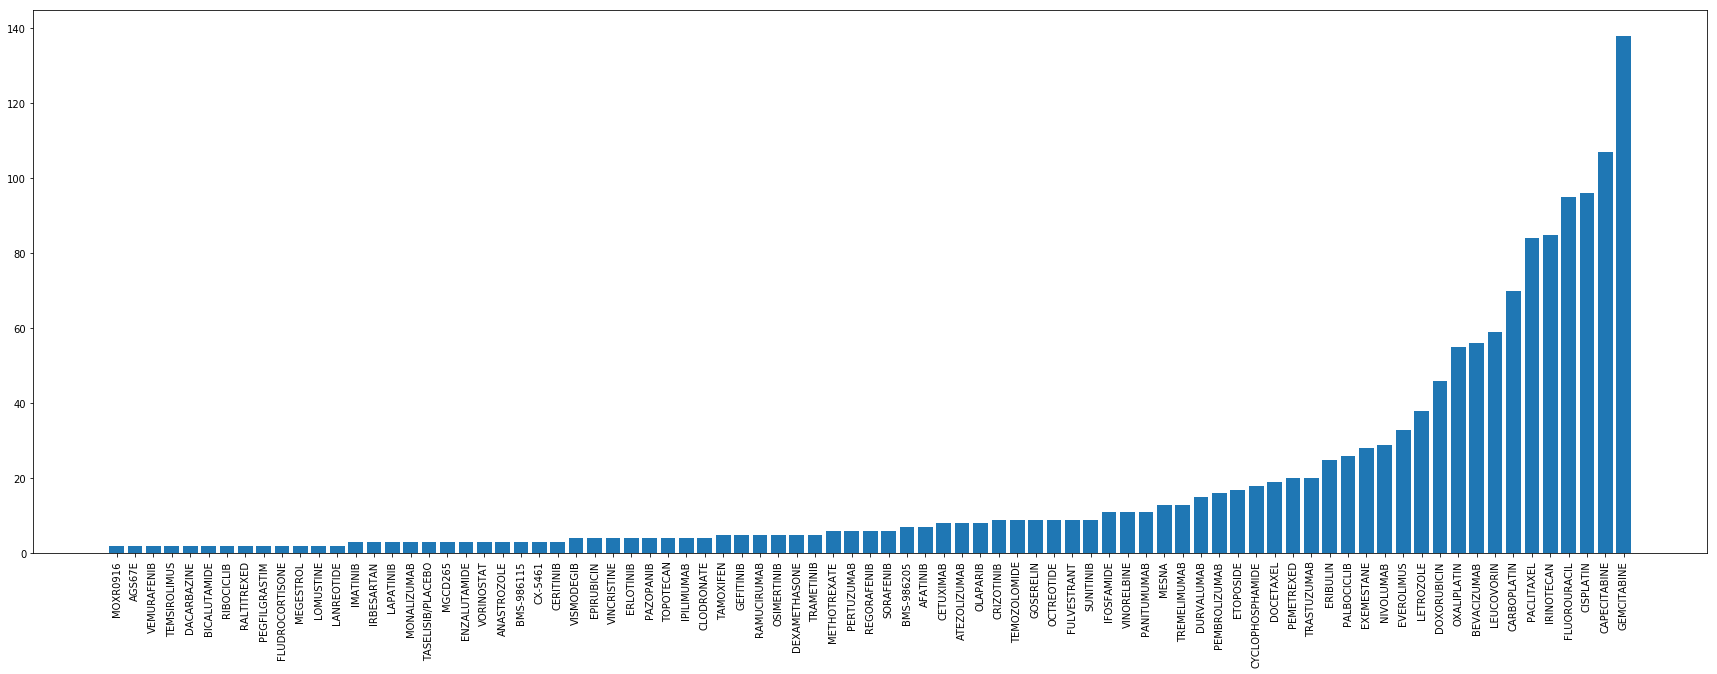

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(drugs, counts)
plt.show()

## Specific cancer type

In [31]:
drugs_expression_sel_df = drugs_expression_df[drugs_expression_df['cancer_cohort'] == 'BRCA']

In [32]:
drugs, counts = np.unique(drugs_expression_sel_df['drug_name'], return_counts=True)

In [33]:
sorted_index = np.argsort(counts)

In [34]:
drugs = drugs[sorted_index]
counts = counts[sorted_index]

In [35]:
drugs

array(['RIBOCICLIB', 'ENZALUTAMIDE', 'DURVALUMAB', 'DEXAMETHASONE',
       'CX-5461', 'SUNITINIB', 'LAPATINIB', 'BMS-986115', 'ATEZOLIZUMAB',
       'OLAPARIB', 'MOXR0916', 'AFATINIB', 'TASELISIB/PLACEBO',
       'BMS-986205', 'METHOTREXATE', 'ANASTROZOLE', 'NIVOLUMAB',
       'CLODRONATE', 'DOCETAXEL', 'PEMBROLIZUMAB', 'TAMOXIFEN',
       'PERTUZUMAB', 'VINORELBINE', 'CYCLOPHOSPHAMIDE', 'GOSERELIN',
       'FULVESTRANT', 'CARBOPLATIN', 'TRASTUZUMAB', 'DOXORUBICIN',
       'PALBOCICLIB', 'ERIBULIN', 'EVEROLIMUS', 'EXEMESTANE', 'LETROZOLE',
       'PACLITAXEL', 'CISPLATIN', 'GEMCITABINE', 'CAPECITABINE'],
      dtype=object)

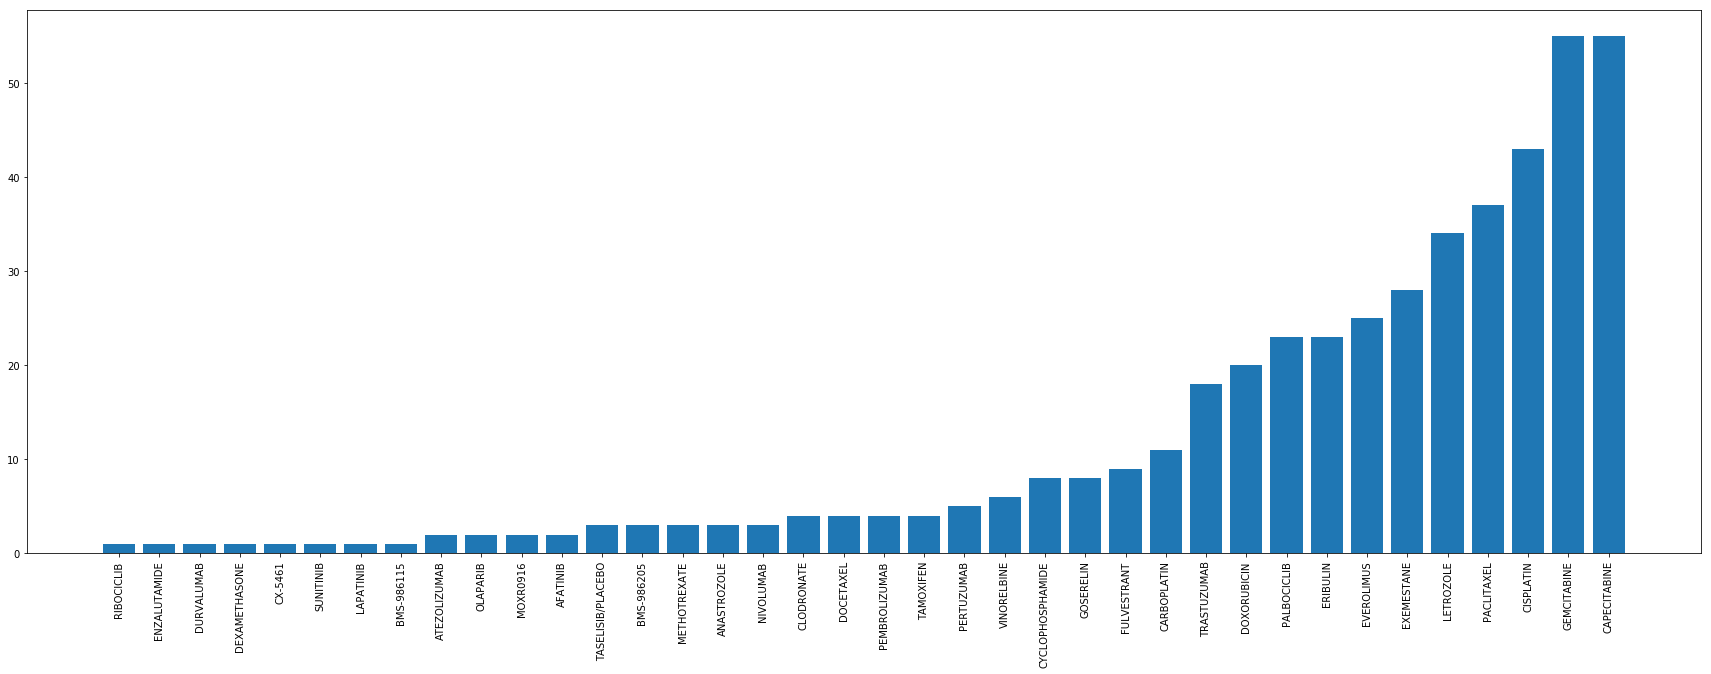

In [36]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(drugs, counts)
plt.show()